In [28]:
import os
import torch
import librosa
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [49]:
def normalize(data):
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    resu= (data-mean)/std
    return resu

def get_mfcc(file_path,sr=44100,fmax=5000):
    wav_data , sr = librosa.load(path=file_path,sr=sr,duration=4)
    wav_data=normalize(wav_data)
    mfcc=librosa.feature.mfcc(y=wav_data, sr=sr,fmax=fmax)
    return mfcc[0:20,0:190],sr
    

def loadedata(data_path):
    major_path=data_path+'Major/'
    minor_path=data_path+'Minor/'
    x_data=[]
    y_data=[]
    for filename in os.listdir(minor_path):
        f = os.path.join(minor_path, filename)
        if os.path.isfile(f):
            mfcc,sr=get_mfcc(f)
            print(mfcc.shape)
            #librosa.display.specshow(mfcc, sr=sr, x_axis='time')
            #plt.show()

class WAVDataset(Dataset):
    def __init__(self):
        self.data_path='./Audio_Files/'
        file_list=glob.glob(self.data_path+"*")
        print(file_list)

In [50]:
data_path='./Audio_Files/'
loadedata(data_path)

(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 199)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 190)
(20, 199)
(20, 190)
(20, 199)
(20, 190)
(20, 190)
(20, 190)
(20, 194)
(20, 190)
(20, 190)
(20, 190)
(20, 199)
(20, 190)


In [2]:
audio_path = './Audio_Files/Major/Major_0.wav'
x , sr = librosa.load(audio_path,sr=44100)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


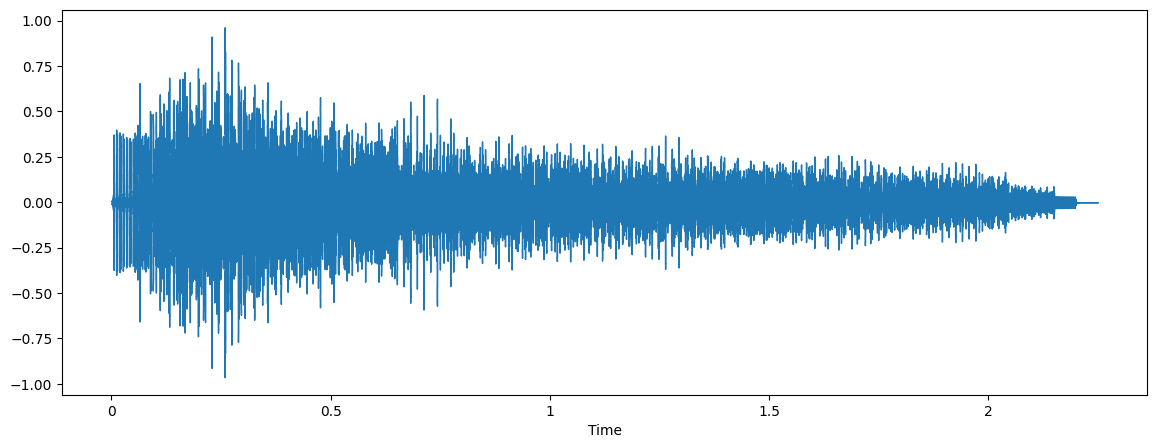

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

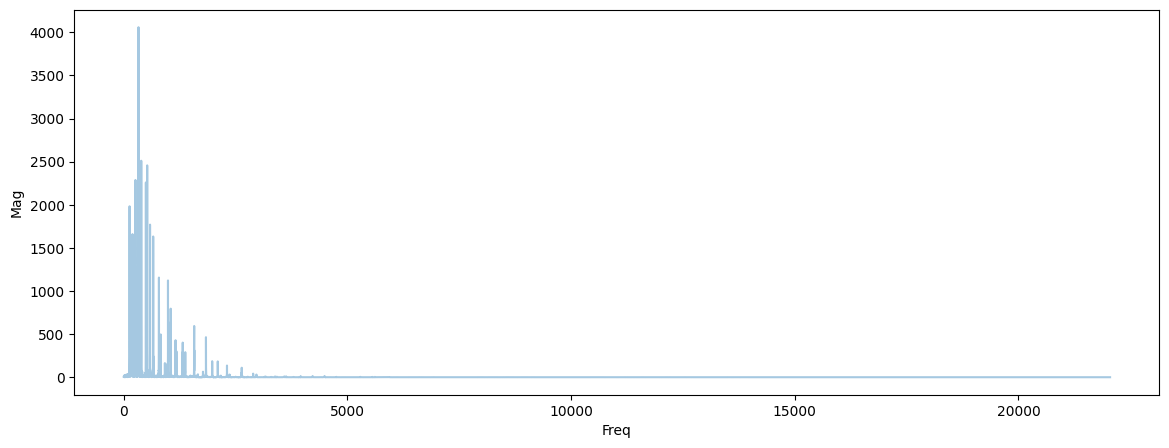

In [4]:
fft = np.fft.fft(x)
spectrum = np.abs(fft)
left_spectrum = spectrum[:int(len(spectrum)/2)]
f = np.linspace(0, sr, len(spectrum))
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=(14, 5))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Freq")
plt.ylabel("Mag")
plt.show()

[[ 14.152242    11.52232      8.782944   ... -34.04889    -40.02326
  -40.02326   ]
 [ 15.0149975   14.844956     9.042734   ... -34.014545   -40.02326
  -40.02326   ]
 [ 16.583363    14.700385     0.28246328 ... -33.866047   -40.02326
  -40.02326   ]
 ...
 [-40.02326    -40.02326    -40.02326    ... -40.02326    -40.02326
  -40.02326   ]
 [-40.02326    -40.02326    -40.02326    ... -40.02326    -40.02326
  -40.02326   ]
 [-40.02326    -40.02326    -40.02326    ... -40.02326    -40.02326
  -40.02326   ]]


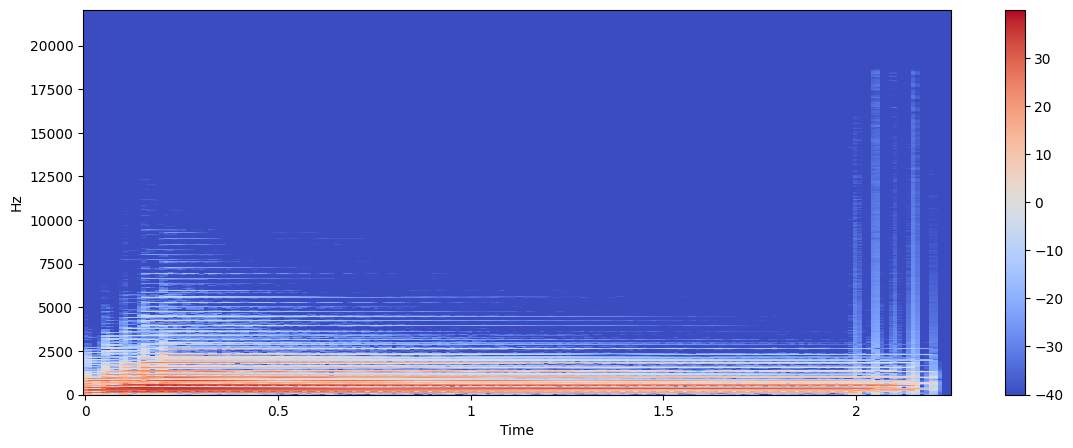

In [10]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
print(Xdb)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 194)


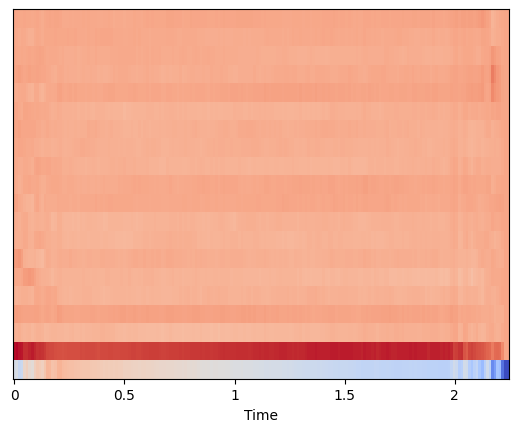

In [17]:
mfccs = librosa.feature.mfcc(y=x, sr=sr,fmax=5000)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')